In [11]:
# (a) Load the Breast cancer data using sklearn.datasets.load breast cancer
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [12]:
# (b) Print out the names of the features (X) and the name of the target (y)
# (X)  feature names 
X =data.data
Xnames = data.feature_names
print("Feature names:")
print(Xnames)

# (y) target names
y = data.target
ynames = data.target_names
print("\nTarget name:")
print(ynames)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target name:
['malignant' 'benign']


In [13]:
# (c) Allocate the half of the data to Train (X train, y train) and the re-maining half to Test (X test, y test).
from sklearn.model_selection import train_test_split

# splitting data into 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# (d) predicting taret using features
# (e) classifiers trained using Train set and testind using Test set
# (f) using entropy index as the cirterion and fix maximum depth of trees as 2
# (g) generates a decision tree from x_train, y_train
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 2)

# (g) generates a decision tree from x_train, y_train
clf.fit(X_train,y_train)

# predict y_pred from X_test
y_pred = clf.predict(X_test)

# comparing acurracy of y_test and y_pred
accuracy = accuracy_score(y_test, y_pred)

#confusion matrix of y_test, y_pred
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8947368421052632
Confusion Matrix:
[[ 88  13]
 [ 17 167]]


<function matplotlib.pyplot.show(close=None, block=None)>

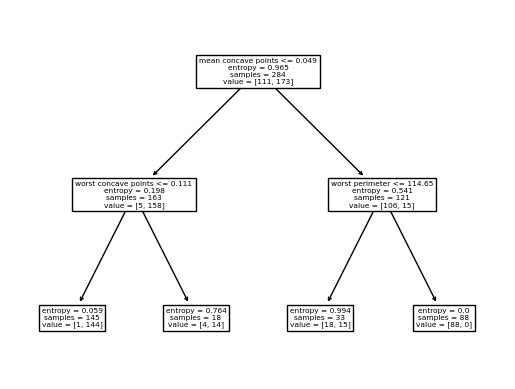

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# (h) visualizing the tree 
plot_tree(clf, feature_names = data.feature_names.tolist())
plt.show

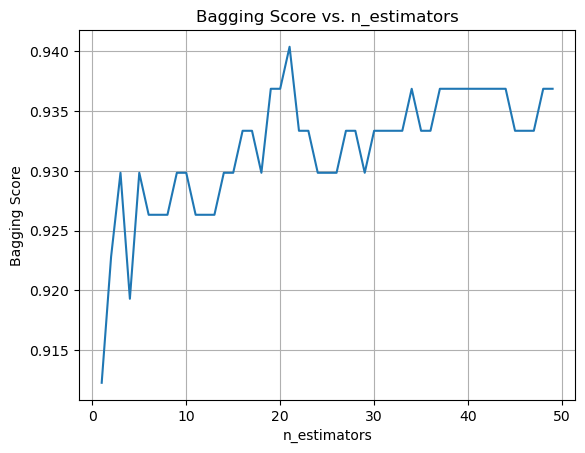

In [16]:
from sklearn.ensemble import BaggingClassifier

# (i) decision tree using bagging 
# sets the range of estimators
n_estimators_range = range(1,50)  

# list to store bagging scores
bagging_scores = []



# generate multiple decision trees using bagging
for n_estimators in n_estimators_range:
    # creates bagging classifier with decision tree classifier (criterion as entropy and max depth of 2 with each estimator in estimator range)
    bagging_clf = BaggingClassifier(
        estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
        n_estimators=n_estimators,
        random_state=0
    )
    
    # training classifier
    bagging_clf.fit(X_train, y_train)
    
    # predicting
    y_pred = bagging_clf.predict(X_test)
    
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # append to list
    bagging_scores.append(accuracy)

# plot the bagging scores for each n_estimator
plt.plot(n_estimators_range, bagging_scores)
plt.xlabel('n_estimators')
plt.ylabel('Bagging Score')
plt.title('Bagging Score vs. n_estimators')
plt.grid(True)
plt.show()

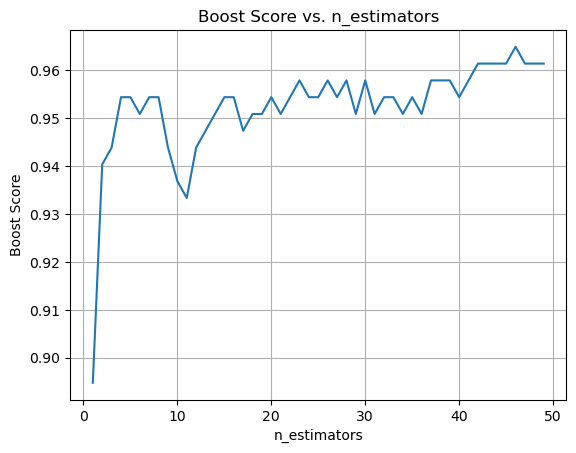

In [17]:
from sklearn.ensemble import AdaBoostClassifier

# (h) decision tree using adaboost
# sets the range of estimators
n_estimators_range = range(1, 50)  

# list to store boost scores
boost_scores = []

# generate multiple decision trees using adaboost
for n_estimators in n_estimators_range:
    # creates adaboost classifier with decision tree classifier (criterion as entropy and max depth of 2 with each estimator in estimator range)
    adaboost_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(criterion = 'entropy',max_depth=2),
        n_estimators=n_estimators,
        random_state=0
    )
    
    # training classifier
    adaboost_clf.fit(X_train, y_train)
    
    # predicting
    y_pred = adaboost_clf.predict(X_test)
    
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # append to list
    boost_scores.append(accuracy)

# plot the boost scores for each n_estimator
plt.plot(n_estimators_range, boost_scores)
plt.xlabel('n_estimators')
plt.ylabel('Boost Score')
plt.title('Boost Score vs. n_estimators')
plt.grid(True)
plt.show()

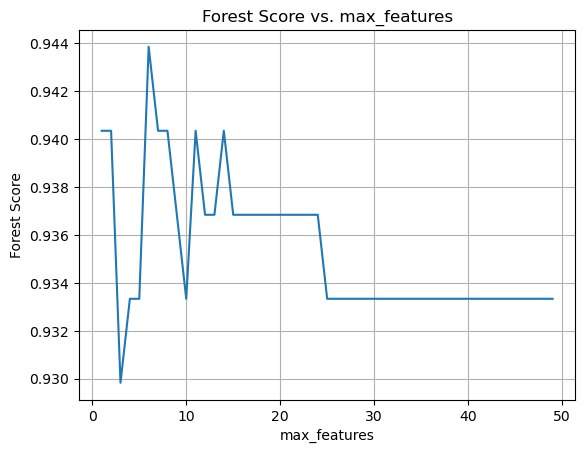

In [18]:
from sklearn.ensemble import RandomForestClassifier

# (j) decision tree using random forest
# sets the range of features
max_features_range = range(1,50)  

# list to store forest scores
forest_scores = []

# generate multiple decision trees using random forest
for max_features in max_features_range:
    # creates random forest classifier with decision tree classifier with fix n_estimators of 100
    rf_clf = RandomForestClassifier(
        criterion='entropy', 
        max_depth=2,
        n_estimators=100,
        max_features=max_features,
        random_state=0
    )
    
    # training classifier
    rf_clf.fit(X_train, y_train)
    
    # predicting
    y_pred = rf_clf.predict(X_test)

    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # append to list
    forest_scores.append(accuracy)

# plot the forest score for each max_features
plt.plot(max_features_range, forest_scores)
plt.xlabel('max_features')
plt.ylabel('Forest Score')
plt.title('Forest Score vs. max_features')
plt.grid(True)
plt.show()